In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
import math


class LogisticRegressionScratch:
    def __init__(self, lr=0.1, epochs=1000, reg_lambda=0.0):
        """
        lr: learning rate
        epochs: number of gradient descent steps
        reg_lambda: L2 regularization strength
        """
        self.lr = lr
        self.epochs = epochs
        self.reg_lambda = reg_lambda
        self.weights = None
        self.classes = None

    def _softmax(self, z):
        z -= np.max(z, axis=1, keepdims=True)
        exp_z = np.exp(z)
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def fit(self, X, y):
        """
        X: features (num_samples x num_features)
        y: labels (num_samples)
        """
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        # One-hot encode y, instead of embedding just for simplicity
        y_onehot = np.zeros((n_samples, n_classes))
        for i, label in enumerate(y):
            y_onehot[i, label] = 1

        # Initialize weights
        self.weights = np.zeros((n_features, n_classes))

        # Gradient Descent
        for epoch in range(self.epochs):
            logits = X @ self.weights
            probs = self._softmax(logits)
            error = probs - y_onehot

            grad = (X.T @ error) / n_samples + self.reg_lambda * self.weights
            self.weights -= self.lr * grad

            if epoch % 100 == 0:
                # log loss
                loss = -np.mean(np.sum(y_onehot * np.log(probs + 1e-9), axis=1))
                print(f"Epoch {epoch}: Loss={loss:.4f}")

    def predict(self, X):
        logits = X @ self.weights
        probs = self._softmax(logits)
        return np.argmax(probs, axis=1)

    def score(self, X, y):
        preds = self.predict(X)
        return np.mean(preds == y)

In [4]:
dataset = load_dataset("ag_news")


train_texts = dataset["train"][:]["text"]
train_labels = dataset["train"][:]["label"]

test_texts = dataset["test"][:]["text"]
test_labels = dataset["test"][:]["label"]


train_texts = train_texts[:8000]
train_labels = train_labels[:8000]
test_texts = test_texts[:2000]
test_labels = test_labels[:2000]

In [10]:
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X_train = vectorizer.fit_transform(train_texts).toarray()
X_test = vectorizer.transform(test_texts).toarray()


logreg = LogisticRegressionScratch(lr=0.5, epochs=900, reg_lambda=0.001)
logreg.fit(X_train, train_labels)

Epoch 0: Loss=1.3863
Epoch 100: Loss=0.3676
Epoch 200: Loss=0.2332
Epoch 300: Loss=0.1746
Epoch 400: Loss=0.1424
Epoch 500: Loss=0.1225
Epoch 600: Loss=0.1092
Epoch 700: Loss=0.0998
Epoch 800: Loss=0.0930


Accuracy: 69.40% ✅


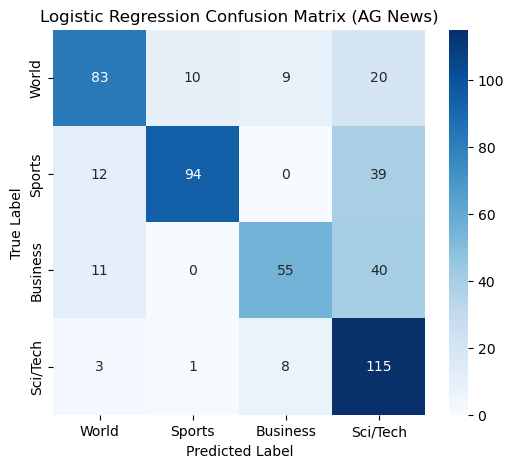

In [11]:
acc = logreg.score(X_test, test_labels)
print(f"Accuracy: {acc * 100:.2f}% ✅")

preds = logreg.predict(X_test)
labels = ["World", "Sports", "Business", "Sci/Tech"]



cm = confusion_matrix(test_labels, preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Logistic Regression Confusion Matrix (AG News)")
plt.show()